# Berlin Trees Visualizations

## Notebook Setup
1. Importing relevant libraries
2. Importing the Dataset
3. inspect data
4. Checking Data types

In [1]:
# This is the convention used to import Pandas.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp


In [2]:
#pip install plotly==5.8.2


In [3]:
#import plotly.express as px

In [4]:
df = pd.read_csv('berlin_trees_data.csv')

/Users/anna/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
pd.set_option("display.max_columns", 85)
pd.set_option("display.max_rows", 85)

df.head()

,Unnamed: 0,ID,Baum Nr.,Objektnr.,Objektname,Baumart deutsch,Baumart botanisch,Gattung botanisch,Straße,Hausnr.,Hausnr. Zusatz,Pflanzjahr,Standalter,Krone Durchmesser in m,Stamm Umfang in cm,Baumhöhe in m,Bezirk
0,0,00008100:000c1b36,16,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,19,0,1936,86,11.0,189.0,17.0,Charlottenburg-Wilmersdorf
1,1,00008100:000c1b35,17,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,19,0,1926,96,12.0,185.0,25.0,Charlottenburg-Wilmersdorf
2,2,00008100:000c1b32,20,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,14-20,0,1980,42,8.0,135.0,12.0,Charlottenburg-Wilmersdorf
3,3,00008100:000c1aa3,24,241,Am Rupenhorn,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Am Rupenhorn,3b,0,1975,47,8.0,215.0,17.0,Charlottenburg-Wilmersdorf
4,4,00008100:000c196a,33,348,Arysallee,Amerikanische Rot-Eiche,Quercus rubra,QUERCUS,Arysallee,11,0,1980,42,13.0,176.0,17.0,Charlottenburg-Wilmersdorf


In [6]:
df.dtypes

Unnamed: 0                  int64
ID                         object
Baum Nr.                   object
Objektnr.                  object
Objektname                 object
Baumart deutsch            object
Baumart botanisch          object
Gattung botanisch          object
Straße                     object
Hausnr.                    object
Hausnr. Zusatz             object
Pflanzjahr                  int64
Standalter                  int64
Krone Durchmesser in m    float64
Stamm Umfang in cm        float64
Baumhöhe in m             float64
Bezirk                     object
dtype: object

In [7]:
print(df.columns)


Index(['Unnamed: 0', 'ID', 'Baum Nr.', 'Objektnr.', 'Objektname',
       'Baumart deutsch', 'Baumart botanisch', 'Gattung botanisch', 'Straße',
       'Hausnr.', 'Hausnr. Zusatz', 'Pflanzjahr', 'Standalter',
       'Krone Durchmesser in m', 'Stamm Umfang in cm', 'Baumhöhe in m',
       'Bezirk'],
      dtype='object')


# Top 10 Trees per District Visualization
1. Check for Districts
2. Group by District
3. Make groups
4. Filter for top 10 trees

In [8]:
print(df['Bezirk'].unique())

['Charlottenburg-Wilmersdorf' 'Friedrichshain-Kreuzberg' 'Lichtenberg'
 'Marzahn-Hellersdorf' 'Neukölln' 'Pankow' 'Reinickendorf' 'Spandau'
 'Steglitz-Zehlendorf' 'Tempelhof-Schöneberg' 'Treptow-Köpenick']


In [9]:
### Splitting Groups per district

df_district = df.groupby(['Bezirk'])

In [10]:
### Defining groups
df_pankow = df_district.get_group('Pankow')

In [11]:
### Filter out top 10 District trees

df_trees_in_pankow = df_pankow['Baumart deutsch'].value_counts()

In [12]:
type(df_trees_in_pankow)


pandas.core.series.Series

<AxesSubplot:title={'center':'Top Ten Trees in Pankow'}>

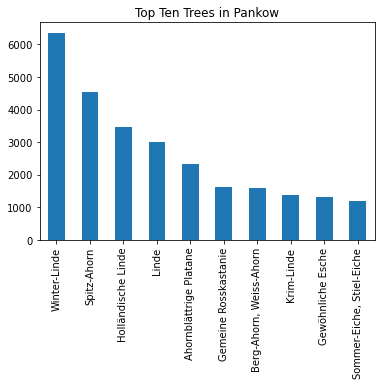

In [13]:
df_trees_in_pankow.head(10).plot.bar(title="Top Ten Trees in Pankow")

# Top 10 Strees with most trees per District Visualization


In [14]:
df_streets_in_pankow = df_pankow['Straße'].value_counts()

<AxesSubplot:title={'center':'Streets with most Trees in Pankow'}>

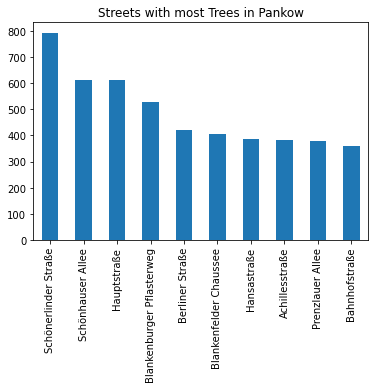

In [15]:
df_streets_in_pankow.head(10).plot.bar(title="Streets with most Trees in Pankow")

## Top Trees
1. oldest
2. highest

In [16]:
df_pankow['Baumhöhe in m'].idxmax

<bound method Series.idxmax of 157228    15.0
157229    15.0
157230    19.0
157231     5.0
157232    20.0
          ... 
199334     NaN
199335    17.0
199336     8.0
199337    15.0
199338     5.0
Name: Baumhöhe in m, Length: 42111, dtype: float64>

In [17]:
### Heighest Tree
max_height_in_pankow = df_pankow['Baumhöhe in m'].idxmax()
heighest_tree_in_pankow = df_pankow.loc[[max_height_in_pankow]]
print(heighest_tree_in_pankow)

        Unnamed: 0                 ID Baum Nr. Objektnr.  Objektname  \
157352      157352  00008100:0021fa79      116     41881  Märchenweg   

       Baumart deutsch             Baumart botanisch Gattung botanisch  \
157352   Hybrid-Pappel  Populus x canadensis Hybride           POPULUS   

            Straße Hausnr. Hausnr. Zusatz  Pflanzjahr  Standalter  \
157352  Märchenweg       0              0        1970          52   

        Krone Durchmesser in m  Stamm Umfang in cm  Baumhöhe in m  Bezirk  
157352                    16.0               314.0           35.0  Pankow  


In [19]:
### Oldest Tree
max_age_in_pankow = df_pankow['Standalter'].idxmax()
oldest_tree_in_pankow = df_pankow.loc[[max_age_in_pankow]]
print(oldest_tree_in_pankow)

        Unnamed: 0                 ID Baum Nr. Objektnr.  \
176283      176283  00008100:0028ca3c      332     41212   

                        Objektname Baumart deutsch Baumart botanisch  \
176283  Hauptstraße (Blankenfelde)         Robinie     Robinia spec.   

       Gattung botanisch       Straße Hausnr. Hausnr. Zusatz  Pflanzjahr  \
176283           ROBINIA  Hauptstraße       0              0          55   

        Standalter  Krone Durchmesser in m  Stamm Umfang in cm  Baumhöhe in m  \
176283        1967                     NaN               130.0           20.0   

        Bezirk  
176283  Pankow  
